In [6]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#              to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
%env QUANDL_API_KEY=dpC9ceaCW6qw9RwVzASC
df = web.DataReader('AAPL.US', 'quandl', '2012-01-01', '2017-12-31')
# df.loc['2019-12-01']
df

env: QUANDL_API_KEY=dpC9ceaCW6qw9RwVzASC


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,170.5200,170.590,169.220,169.23,25643711.0,0.0,1.0,170.520000,170.590000,169.220000,169.230000,25643711.0
2017-12-28,171.0000,171.850,170.480,171.08,15997739.0,0.0,1.0,171.000000,171.850000,170.480000,171.080000,15997739.0
2017-12-27,170.1000,170.780,169.710,170.60,21672062.0,0.0,1.0,170.100000,170.780000,169.710000,170.600000,21672062.0
2017-12-26,170.8000,171.470,169.679,170.57,32968167.0,0.0,1.0,170.800000,171.470000,169.679000,170.570000,32968167.0
2017-12-22,174.6800,175.424,174.500,175.01,16052615.0,0.0,1.0,174.680000,175.424000,174.500000,175.010000,16052615.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-09,425.5001,427.750,421.350,421.73,14072300.0,0.0,1.0,54.682693,54.971837,54.149348,54.198183,98506100.0
2012-01-06,419.7700,422.750,419.220,422.40,11367600.0,0.0,1.0,53.946296,54.329267,53.875613,54.284287,79573200.0
2012-01-05,414.9500,418.550,412.670,418.03,9688200.0,0.0,1.0,53.326858,53.789509,53.033847,53.722681,67817400.0


In [20]:
# Get the number of rows and columns in the data set
df.shape

(1507, 12)

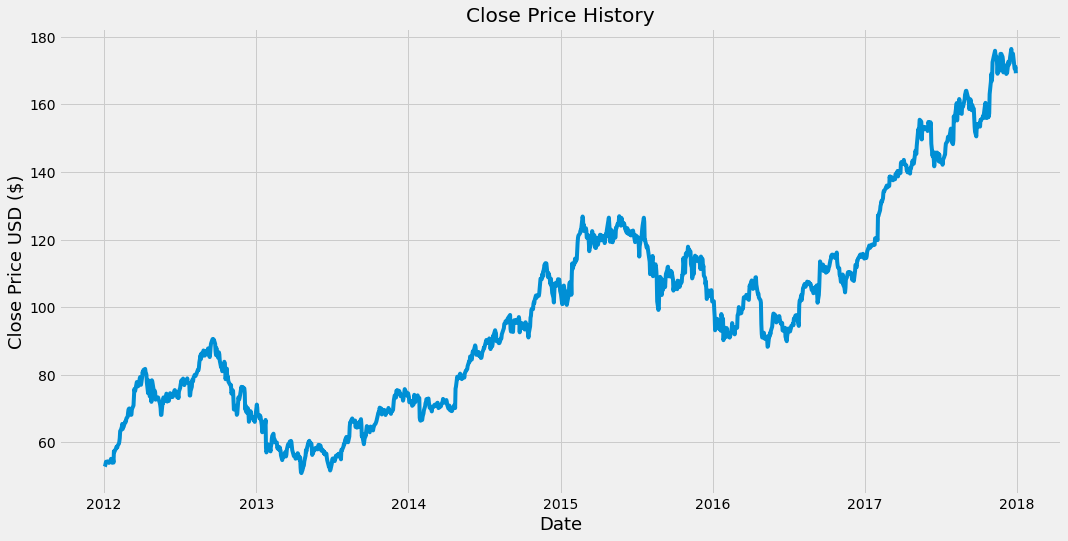

In [24]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['AdjClose'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [39]:
df = df.reindex(index=df.index[::-1])

# Create a new dataframe with only the Close column
data = df.filter(['AdjClose'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1206

In [40]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01529977],
       [0.017563  ],
       [0.02226356],
       ...,
       [0.95362225],
       [0.95744722],
       [0.94270515]])

In [41]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.01529977, 0.017563  , 0.02226356, 0.02673883, 0.02605269,
       0.02759906, 0.02689244, 0.0257045 , 0.02408644, 0.02909423,
       0.03361045, 0.03221769, 0.02458824, 0.03186848, 0.02470089,
       0.05158318, 0.04950429, 0.05221812, 0.05808614, 0.06163972,
       0.06134273, 0.06024696, 0.0649168 , 0.06931013, 0.0742872 ,
       0.08232628, 0.09921348, 0.0994695 , 0.10887062, 0.11589586,
       0.10382187, 0.10847123, 0.10837906, 0.12141569, 0.11956209,
       0.12299279, 0.12915779, 0.13258848, 0.14247093, 0.14967026,
       0.15174916, 0.15247626, 0.14016673, 0.13719688, 0.13763723,
       0.14920942, 0.15246602, 0.15946053, 0.17594834, 0.19794573,
       0.1938289 , 0.19383914, 0.20974322, 0.21472028, 0.21117694,
       0.20794082, 0.20457158, 0.21576485, 0.2234455 , 0.22666114])]
[0.21871422118009076]

[array([0.01529977, 0.017563  , 0.02226356, 0.02673883, 0.02605269,
       0.02759906, 0.02689244, 0.0257045 , 0.02408644, 0.02909423,
       0.03361045, 0.03221769, 0.02

In [45]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1146, 60, 1)

In [47]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1146/1146 [==============================] - 59s 45ms/step - loss: 0.0017


In [56]:
# Create the testing data set
# Create a new array containing scaled values from index 1147 to 1507
test_data = scaled_data[training_data_len-60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

(301, 1)

In [61]:
#Convert the data to a numpy array
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(301, 60, 1)

In [63]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 0s 28ms/step


In [66]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( ((predictions-y_test)**2) ) )
rmse

7.5282111681944714

<ipython-input-67-78cbc4cbbdfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


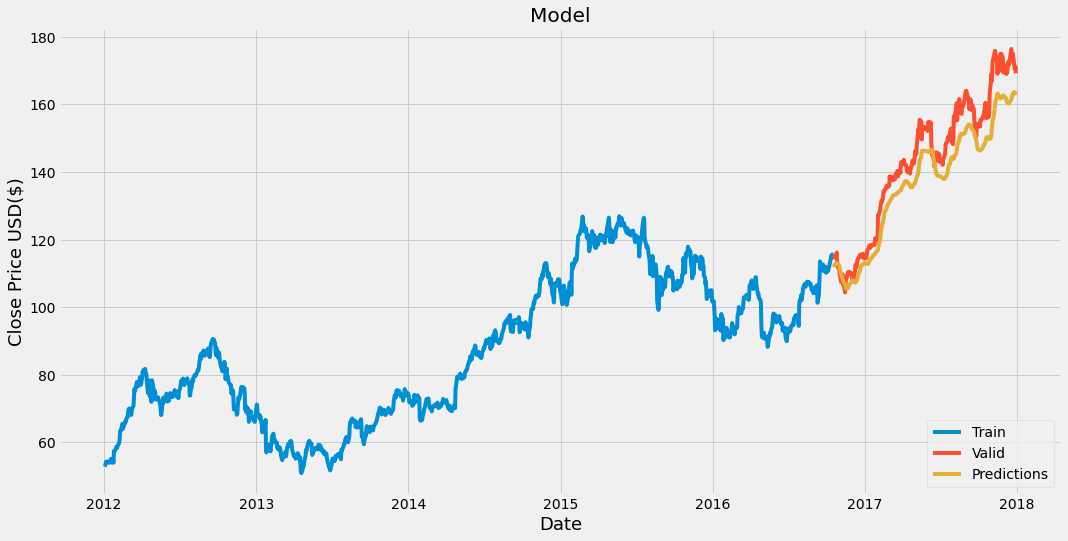

In [67]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['AdjClose'])
plt.plot(valid[['AdjClose', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [68]:
# Show the valid and predicted prices
valid

,AdjClose,Predictions
Date,,
2016-10-18,115.420062,111.917641
2016-10-19,115.076170,112.296150
2016-10-20,115.017217,112.568642
2016-10-21,114.565244,112.749519
2016-10-24,115.596921,112.821655
...,...,...
2017-12-22,175.010000,163.326248
2017-12-26,170.570000,163.647964
2017-12-27,170.600000,163.526901


In [73]:
# Get the quote
apple_quote = web.DataReader('AAPL.US', 'quandl', '2012-01-01', '2017-12-31')

# Create a new dataframe
new_df = apple_quote.filter(['AdjClose']).reindex(index=apple_quote.index[::-1])

#Get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 43ms/step
[[162.24127]]


In [74]:
# Get the quote
apple_quote2 = web.DataReader('AAPL.US', 'quandl', '2017-12-18', '2017-12-18')
print(apple_quote2['AdjClose'])

Date
2017-12-18    176.42
Name: AdjClose, dtype: float64
